## 파이토치 기초 (1) - 텐서와 Autograd

In [1]:
# 파이토치 임포트
import torch

* 텐서는 파이토치에서 다양한 수식을 계산하는 데 사용하는 가장 기본적 자료구조입니다.
* 수학의 벡터나 행렬을 일반화한 개념으로, 숫자들을 특정한 모양으로 배열한 것입니다.
* 텐서에는 '차원' 또는 '랭크'라는 개념이 있으며, 랭크가 0이면 숫자 하나인 스칼라, 랭크 1 텐서는 일렬로 숫자를 나열한 벡터, 랭크 2 텐서는 2차원 행렬, 랭크 3 텐서는 정육면체 같은 3차원 행렬로 이해하면 됩니다.

In [5]:
# 랭크 2 텐서
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


* unsqueeze(), squeeze(), view() 함수로 텐서의 랭크와 shape를 인위적으로 바꿀 수도 있습니다.

In [6]:
# unsqueeze()를 사용하여 랭크 늘리기
x = torch.unsqueeze(x, 0) # [3,3]형태의 랭크 2텐서의 첫번째(index상 0번째)자리에 1이라는 차원값을 추가해 [1,3,3]모양의 랭크3텐서로 변경
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [7]:
# squeeze()를 사용하여 다시 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension()) # 랭크는 변화했지만 원소 개수는 계속 9개로 영향을 받지 않습니다

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [8]:
# view()를 사용하여 모양 바꾸기도 가능
# 랭크의 형태 바꾸기
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension()) #단, 원소의 개수는 변경 불가능

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [9]:
# 다음과 같이 원소가 9개인 텐서는 2x4, 즉 원소가 8개인 텐서로 변경할 수 없음
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


## 텐서를 이용한 연산과 행렬곱

In [10]:
# 행렬 w : 정규분포에서 무작위로 값을 뽑아 텐서를 생성하는 randn()함수로 지정
# 행렬 x : 직접 실수형 원소들을 넣어 지정
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-0.4755, -0.5019,  0.9038],
        [ 0.0386, -0.1392,  1.7195],
        [ 0.4881, -0.4314, -0.3741],
        [ 0.6433,  0.7554,  0.6387],
        [-1.0434, -1.0766, -1.5684]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [11]:
# 다른 행렬 연산에 쓰일 b라는 텐서 추가지정
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[ 0.0668, -0.5590],
        [ 2.1284,  0.9211],
        [-0.6205,  0.4756],
        [ 0.1929, -0.6944],
        [ 0.9911,  0.2887]])


In [12]:
# torch.mm()함수를 이용해 행렬곱 수행
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[  2.5380,   2.4644],
        [  8.2187,   9.8376],
        [ -2.6765,  -2.9940],
        [  6.1031,   8.1405],
        [-12.1152, -15.8036]])


In [13]:
# wx 행렬의 원소에 b 행렬의 원소 더하기
result = wx + b	
print("result size:", result.size()) 
print("result:", result) 

result size: torch.Size([5, 2])
result: tensor([[  2.6048,   1.9054],
        [ 10.3470,  10.7586],
        [ -3.2971,  -2.5183],
        [  6.2960,   7.4461],
        [-11.1240, -15.5149]])


## Autograd

* Autograd는 수식의 기울기를 자동으로 계산한다는 뜻입니다
* 파이토치의 Autograd는 미분 계산을 자동화하여 경사하강법을 구현하는 수고를 덜어줍니다.

In [14]:
#값이 1.0인 스칼라 텐서 w를 정의하고 수식을 w에 대해 미분하여 기울기를 계산합니다
# requires_grad = True로 설정하면 파이토치의 Autograd 기능이 자동으로 계산할 때 w에 대한 미분값을 w.grad에 저장합니다.
w = torch.tensor(1.0, requires_grad=True)

In [15]:
#수식 a = w x 3을 정의합니다
a = w*3

In [16]:
# w에 3을 곱한 a를 제곱하여 l을 만듭니다
l = a**2

In [17]:
#l을 w로 미분하려면 연쇄법칙(chain rule)을 이용하여 a와 w로 차례대로 미분합니다. -> .backward()함수를 사용합니다
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


## 경사하강법으로 이미지 복원하기

* 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌습니다. 
* 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황입니다. 
* 다행히도 weird_function()의 소스코드는 남아 있습니다. 
* 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해봅시다.

### 해결방법

1. 오염된 이미지와 크기가 같은 랜덤 텐서를 생성한다.(랜덤 텐서는 오염된 이미지와 크기가 같은 무작위 이미지 텐서입니다)
2. 랜덤 텐서를 weird_function 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.
* a. [사실] 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다
* b. [사실] 인위적으로 생성한 무작위 이미지가 weird_function()함수에 입력되어 가설을 출력했다.
3. 가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것이다.
4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

'가설'과 원본 이미지가 weird_function() 함수를 통해 오염되기 전의 이미지(정답) 사이의 거리를 오차라 하고, 이 오찻값이 최솟값이 되도록 랜덤 텐서(random_tensor)를 바꿔주는 것이 우리의 목표입니다.

In [18]:
import torch
import pickle
import matplotlib.pyplot as plt

* 오염된 이미지 출처 : https://bit.ly/2m2xQt8

In [19]:
# 오염된 이미지를 파이토치의 텐서 형태로 읽습니다
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('broken_image_t.p', 'rb'),encoding='latin1' ) )

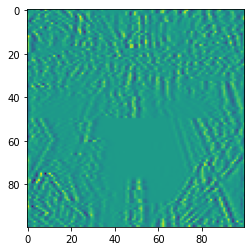

In [20]:
plt.imshow(broken_image.view(100,100)) 

In [21]:
# 이미지를 오염시키는 weird_function()입니다. 머신러닝을 이용해 복원할 것이기 때문에 다음 함수를 이해할 필요는 없습니다!
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [23]:
# 무작위 텐서(random_tensor)를 weird_function()함수에 입력해 얻은 가설텐서와 오염된 이미지 사이의 오차를 구하는 함수입니다
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image) 
#torch.dist()는 두 텐서 사이의 거리를 구하는 함수입니다. 이 예제에서는 단순 거리를 오차로 설정하였습니다

In [24]:
# broken_image와 같은 모양과 랭크를 지니는 무작위 텐서를 생성합니다.([100,100]모양의 행렬이 [10000]모양의 벡터로 표현된 텐서입니다.)
random_tensor = torch.randn(10000, dtype = torch.float)

In [25]:
# 학습을 얼마나 급하게 진행하는가를 결정하는 매개변수를 학습률(learning rate)라고 합니다
# 예제에서는 learning rate를 0.8로 설정하였습니다
lr = 0.8

In [26]:
#경사하강법의 for 반복문입니다.
for i in range(0,20000):
    random_tensor.requires_grad_(True) #오차함수를 random_tensor로 미분하기 위해 requrires_grad는 True로 설정합니다.
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    # random_tensor를 weird_function에 통과시켜 가설(hypothesis)을 구합니다.
    # 앞서 정의한 distance_loss 함수로 hypothesis와 broken_image의 오차를 계산합니다.
    # 이후 loss.backward() 함수를 호출해 loss를 random_tensor로 미분합니다.
    with torch.no_grad(): 
        # 이번 예제에서는 직접 경사하강법을 구현하므로 torch.no_grad()를 이용해 파이토치의 자동기울기 계산을 비활성화합니다.
        random_tensor = random_tensor - lr*random_tensor.grad
        # loss.backward()에서 계산한 loss의 기울기(loss가 최댓점이 되는 곳의 방향)와 만대쪽으로 random_tensor를 학습률(lr)만큼 이동시킵니다.
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
        # for문이 1000번 반복될 때마다 오차를 출력합니다

Loss at 0 = 12.139164924621582
Loss at 1000 = 1.1028016805648804
Loss at 2000 = 0.5375909209251404
Loss at 3000 = 0.37769049406051636
Loss at 4000 = 0.3012517988681793
Loss at 5000 = 0.2535681128501892
Loss at 6000 = 0.2187555730342865
Loss at 7000 = 0.19086067378520966
Loss at 8000 = 0.16717104613780975
Loss at 9000 = 0.14624224603176117
Loss at 10000 = 0.1272171437740326
Loss at 11000 = 0.10954635590314865
Loss at 12000 = 0.09286143630743027
Loss at 13000 = 0.0769084244966507
Loss at 14000 = 0.06151008605957031
Loss at 15000 = 0.04654217138886452
Loss at 16000 = 0.03191869333386421
Loss at 17000 = 0.021139461547136307
Loss at 18000 = 0.021164974197745323
Loss at 19000 = 0.021167472004890442


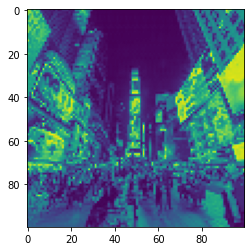

In [27]:
plt.imshow(random_tensor.view(100,100).data)
# 반복문 실행 결과 random_tensor가 제대로 복원되었는지 확인합니다

* 원본 이미지는 뉴욕 타임스퀘어의 풍경이었음을 확인할 수 있습니다!